In [1]:
#Install omdb library
!pip install omdb

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Dependencies
import pandas as pd
import requests
import json
import omdb
import time
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint
from config import omdb_key

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#Read in csv and create initial dataframe
actors = pd.read_csv("Craig_portion/Resources/tmdb_5000_credits.csv")
actors.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#Create input for preferred actor
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Harrison Ford


In [5]:
#Locate and count all movies selected actor was in
selected_actor = actors[actors["cast"].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)

#Display
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Harrison Ford has been in 32 movies


In [6]:
#Create dataframe for all movies acted in
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["title"])
movies_played_in

Harrison Ford has been in the following movies


,title
0,Indiana Jones and the Kingdom of the Crystal S...
1,Ender's Game
2,The Expendables 3
3,What Lies Beneath
4,The Devil's Own
5,K-19: The Widowmaker
6,Air Force One
7,Six Days Seven Nights
8,Hollywood Homicide
9,Random Hearts


In [7]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

Metascore = {"Rotten Tomatoes Score": [],
             "Year Released": [],
             "Rated": [],
             "Plot": []}

Genre = {"Genre": []}

for movie in selected_actor["title"]:
         
    url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie, omdb_key)
    
    #Print log of movie being processed
    print(f"Now retrieving Movie Data for: " + movie)
    print(url)
    
    #Run requests to API
    movie_data = requests.get(url).json()
    
   # Rating = movie_data["Ratings"]
    
    Metascore["Rotten Tomatoes Score"].append(movie_data["Ratings"][1]["Value"])
    Metascore["Year Released"].append(movie_data["Year"])
    Metascore["Rated"].append(movie_data["Rated"])
    Metascore["Plot"].append(movie_data["Plot"])
    
    Genre["Genre"].append(movie_data["Genre"])
       
    pprint(movie_data)   

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: Indiana Jones and the Kingdom of the Crystal Skull
http://www.omdbapi.com/?t=Indiana Jones and the Kingdom of the Crystal Skull&apikey=47006815
{'Actors': 'Harrison Ford, Cate Blanchett, Karen Allen, Shia LaBeouf',
 'Awards': 'Nominated for 1 BAFTA Film Award. Another 10 wins & 35 '
           'nominations.',
 'BoxOffice': '$316,957,122',
 'Country': 'USA',
 'DVD': '14 Oct 2008',
 'Director': 'Steven Spielberg',
 'Genre': 'Action, Adventure, Fantasy',
 'Language': 'English, German, Russian',
 'Metascore': '65',
 'Plot': 'Famed archaeologist and adventurer Dr. Henry "Indiana" Jones, Jr. is '
         'called back into action, when he becomes entangled in a Soviet plot '
         'to uncover the secret behind mysterious artifacts known as the '
         'Crystal Skulls.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTIxNDUxNzcyMl5BMl5BanBnXkFtZTcwNTgwOTI3MQ@@._V1

{'Actors': 'Harrison Ford, Josh Hartnett, Lena Olin, Bruce Greenwood',
 'Awards': '1 win.',
 'BoxOffice': '$30,013,346',
 'Country': 'USA',
 'DVD': '07 Oct 2003',
 'Director': 'Ron Shelton',
 'Genre': 'Action, Comedy, Crime',
 'Language': 'English',
 'Metascore': '47',
 'Plot': 'Two LAPD detectives who moonlight in other fields investigate the '
         'murder of an up-and-coming rap group.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTU5Mjk1NzQ4Nl5BMl5BanBnXkFtZTYwMTYxNzk5._V1_SX300.jpg',
 'Production': 'Columbia Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.3/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '30%'},
             {'Source': 'Metacritic', 'Value': '47/100'}],
 'Released': '13 Jun 2003',
 'Response': 'True',
 'Runtime': '116 min',
 'Title': 'Hollywood Homicide',
 'Type': 'movie',
 'Website': 'http://www.sonypictures.com/movies/hollywoodhomicide/index.html',
 'Writer': 'Robert Souza, Ron Shel

{'Actors': 'Harrison Ford, Tommy Lee Jones, Sela Ward, Julianne Moore',
 'Awards': 'Won 1 Oscar. Another 11 wins & 33 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '24 Nov 1998',
 'Director': 'Andrew Davis',
 'Genre': 'Action, Crime, Drama',
 'Language': 'English, Polish, Spanish',
 'Metascore': '88',
 'Plot': 'Dr. Richard Kimble, unjustly accused of murdering his wife, must '
         'find the real killer while being the target of a nationwide manhunt '
         'lead by a seasoned US Marshall.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BYmFmOGZjYTItYjY1ZS00OWRiLTk0NDgtMjQ5MzBkYWE2YWE0XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '96%'},
             {'Source': 'Metacritic', 'Value': '88/100'}],
 'Released': '06 Aug 1993',
 'Response': 'True',
 'Runtime': '130 min',
 'Title': 'The

{'Actors': 'Blake Lively, Michiel Huisman, Harrison Ford, Ellen Burstyn',
 'Awards': '1 win & 9 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA, Canada',
 'DVD': '08 Sep 2015',
 'Director': 'Lee Toland Krieger',
 'Genre': 'Drama, Fantasy, Romance',
 'Language': 'English, Portuguese, Italian',
 'Metascore': '51',
 'Plot': 'A young woman, born at the turn of the 20th century, is rendered '
         'ageless after an accident. After many solitary years, she meets a '
         'man who complicates the eternal life she has settled into.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTAzMTQzMTA2MjheQTJeQWpwZ15BbWU4MDk2MTg2MzUx._V1_SX300.jpg',
 'Production': 'Lionsgate',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.2/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '56%'},
             {'Source': 'Metacritic', 'Value': '51/100'}],
 'Released': '24 Apr 2015',
 'Response': 'True',
 'Runtime': '112 min',
 'Title': 'The Age of Adaline',
 '

{'Actors': 'Robert Shaw, Harrison Ford, Barbara Bach, Edward Fox',
 'Awards': 'N/A',
 'BoxOffice': 'N/A',
 'Country': 'UK, USA',
 'DVD': '15 Aug 2001',
 'Director': 'Guy Hamilton',
 'Genre': 'Action, Drama, War',
 'Language': 'English, Croatian, Serbian',
 'Metascore': '42',
 'Plot': 'During World War II, several oddly assorted military experts are '
         'teamed in a mission to raid and destroy a bridge vital to enemy '
         'strategy.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BYTNjZGYyYzktMDYyOC00NDMwLTg3MGItNjU2MGQwN2I5MjlhXkEyXkFqcGdeQXVyNjUwNzk3NDc@._V1_SX300.jpg',
 'Production': 'Columbia Pictures',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.4/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '64%'},
             {'Source': 'Metacritic', 'Value': '42/100'}],
 'Released': '08 Dec 1978',
 'Response': 'True',
 'Runtime': '118 min',
 'Title': 'Force 10 from Navarone',
 'Type': 'movie',
 'Website': 'N/A',
 'Wr

In [8]:
#Create final dataframe 
metascore_final = pd.DataFrame(Metascore)

#Merge above dataframe with movie titles
df_merge = pd.merge(metascore_final, movies_played_in, left_index=True, right_index=True)

#Reorder column headers
df_merge2 = df_merge[["title", "Year Released", "Rated", "Rotten Tomatoes Score", "Plot"]]

#Rename column header
final = df_merge2.rename(index=str, columns={"title": "Title"})

#Sort year released value and reset index
final.sort_values(by= "Year Released", ascending=True, inplace=True)
final.reset_index(inplace=True)

#Delete unnecessary column
del final["index"]

#Display
final

,Title,Year Released,Rated,Rotten Tomatoes Score,Plot
0,American Graffiti,1973,PG,95%,A couple of high school grads spend one final ...
1,The Conversation,1974,PG,98%,"A paranoid, secretive surveillance expert has ..."
2,Star Wars,1977,PG,93%,Luke Skywalker joins forces with a Jedi Knight...
3,Force 10 from Navarone,1978,PG,64%,"During World War II, several oddly assorted mi..."
4,Apocalypse Now,1979,R,96%,"During the Vietnam War, Captain Willard is sen..."
5,The Empire Strikes Back,1980,PG,94%,After the rebels are overpowered by the Empire...
6,Raiders of the Lost Ark,1981,PG,94%,Archaeologist and adventurer Indiana Jones is ...
7,Blade Runner,1982,R,90%,A blade runner must pursue and try to terminat...
8,Return of the Jedi,1983,PG,80%,After a daring mission to rescue Han Solo from...
9,Indiana Jones and the Temple of Doom,1984,PG,85%,"After arriving in India, Indiana Jones is aske..."


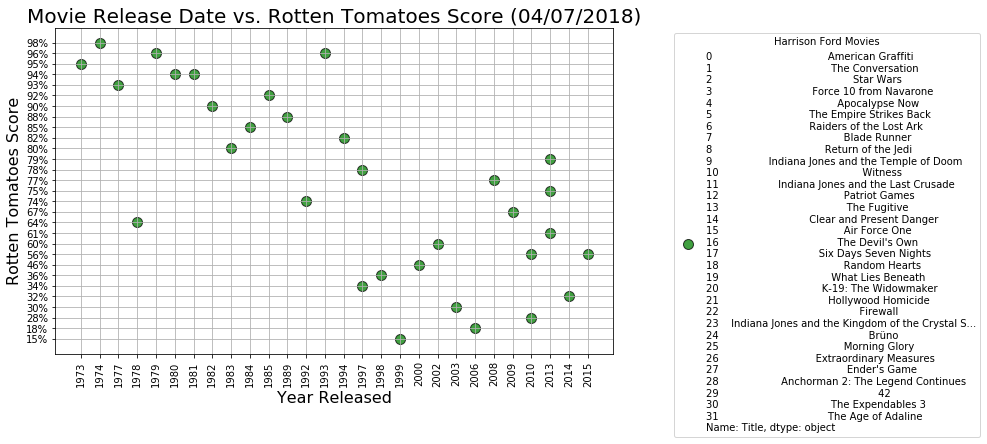

In [9]:
#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatterplot for each "Screen Name" comparing "Tweets Ago" & "Compound Score"
plt.scatter(final["Year Released"], final["Rotten Tomatoes Score"], color= "green", edgecolor= "black",
            label= (final["Title"]), s= 100, alpha = 0.75)

#Aesthetics
y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.title("Movie Release Date vs. Rotten Tomatoes Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Year Released", fontsize=16)
plt.xticks(rotation= 90)
plt.ylabel("Rotten Tomatoes Score", fontsize=16)
plt.legend(bbox_to_anchor= (1.1, 1), title= actor_name + " Movies", fontsize= "medium")

#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Rotten_Tomatoes_Score.png", bbox_inches= "tight")

#Display Output
plt.grid()
plt.show()

### Sentiment Analysis movies actor played in

In [10]:
#Create list for compound sentiment analysis scores
compound_score = []

#Loop through plot summary for each movie
for row in final["Plot"]:
    # Run sentiment analysis
    compound = analyzer.polarity_scores(row)["compound"]
    compound_score.append(compound)
    pos = analyzer.polarity_scores(row)["pos"]
    neu = analyzer.polarity_scores(row)["neu"]
    neg = analyzer.polarity_scores(row)["neg"]
# Print Analysis
    print(row)
    print("Compound Score: %s" % compound)
    print("Positive Score: %s" % pos)
    print("Neutral Score: %s" % neu)
    print("Negative Score: %s" % neg)
    print("\n")

A couple of high school grads spend one final night cruising the strip with their buddies before they go off to college.
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score: 0.0


A paranoid, secretive surveillance expert has a crisis of conscience when he suspects that a couple, on whom he is spying, will be murdered.
Compound Score: -0.9169
Positive Score: 0.0
Neutral Score: 0.569
Negative Score: 0.431


Luke Skywalker joins forces with a Jedi Knight, a cocky pilot, a Wookiee and two droids to save the galaxy from the Empire's world-destroying battle-station while also attempting to rescue Princess Leia from the evil Darth Vader.
Compound Score: 0.1531
Positive Score: 0.153
Neutral Score: 0.708
Negative Score: 0.139


During World War II, several oddly assorted military experts are teamed in a mission to raid and destroy a bridge vital to enemy strategy.
Compound Score: -0.8658
Positive Score: 0.071
Neutral Score: 0.579
Negative Score: 0.35


During the Vietnam 

In [11]:
#Create dataframe for compound scores
compound_score_df = pd.DataFrame(compound_score, columns=["Compound Score"])
compound_score_df.head()

#Create dataframe for movie titles
titles = []
for title in final["Title"]:
    titles.append(title)
titles_df = pd.DataFrame(titles, columns=["Title"])
titles_df.head()

#Merge above dataframes
title_compound = pd.merge(titles_df, compound_score_df, left_index=True, right_index=True)
first_merge = pd.DataFrame(title_compound)
first_merge.head()

,Title,Compound Score
0,American Graffiti,0.0000
1,The Conversation,-0.9169
2,Star Wars,0.1531
3,Force 10 from Navarone,-0.8658
4,Apocalypse Now,-0.7096


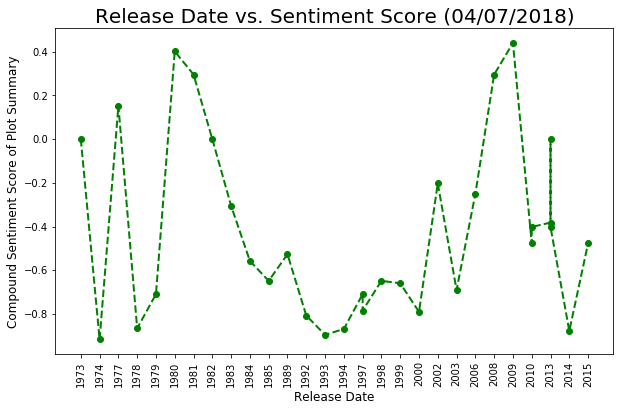

In [12]:
#Set size of bar plots
plt.figure(figsize=(10,6))

plt.plot(final["Year Released"], first_merge["Compound Score"], color= "green", marker= "o", linestyle= "dashed",
linewidth= 2, markersize= 6)

#Aesthetics
plt.title("Release Date vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Release Date", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

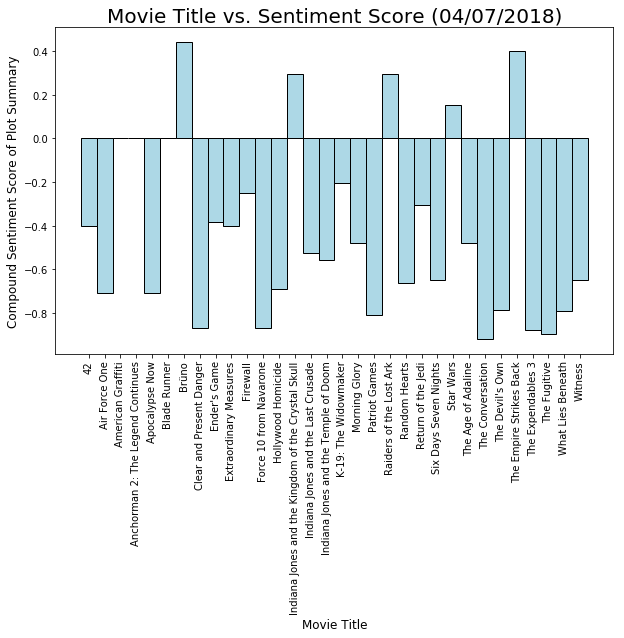

In [13]:
#Set size of bar plots
plt.figure(figsize=(10,6))

#Create bar plots for comparing the results of compound sentiment score for each movie plot
plt.bar(first_merge["Title"], first_merge["Compound Score"], color= "lightblue", edgecolor= "black", width= 1)

#Aesthetics
plt.title("Movie Title vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Movie Title", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
plt.savefig("Images/Movie_Title_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

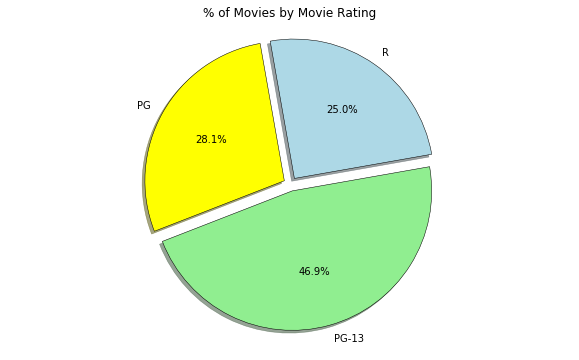

In [14]:
#Set size of pie chart
plt.figure(figsize=(10,6))

#Group "final" dataframe by "Rated"
rating = final.groupby("Rated").count()
final_rating = pd.DataFrame(rating)

total_movies = rating["Title"]

#Set pie chart labels
labels = total_movies.index

#Define color and explode values for all pie chart use
colors = ["yellow", "lightgreen", "lightblue"]
explode = [.05, .05, .05]

#Create pie chart for "% of Total Fares by City Type"
plt.pie(total_movies, startangle = 100, colors = colors, explode = explode, labels = labels, 
        autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#Format
plt.title("% of Movies by Movie Rating")

#Save plot as PNG image
plt.savefig("Images/Percent_of_Movies_by_Rating.png", bbox_inches= "tight")

#Display
plt.axis("equal")
plt.show()

# Ignore below

In [15]:
#Export DataFrame as CSV
#movie_info.to_csv("basic_movie_info.csv")

In [16]:
#Create genre dataframe
movie_genre = pd.DataFrame(Genre)
#Merge to movies_played_in dataframe
title_genre_merge = pd.merge(movie_genre, movies_played_in, left_index=True, right_index=True)
#Display
title_genre_merge.head()

,Genre,title
0,"Action, Adventure, Fantasy",Indiana Jones and the Kingdom of the Crystal S...
1,"Action, Fantasy, Sci-Fi",Ender's Game
2,"Action, Adventure, Thriller",The Expendables 3
3,"Drama, Fantasy, Horror",What Lies Beneath
4,"Action, Crime, Drama",The Devil's Own


In [ ]:
# Read and display the CSV with Pandas 
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)

#Create df for movie titles and display
movie_info = pd.DataFrame(movies_df[["title",
                                     "release_date",
                                     "revenue",
                                     "runtime",
                                     "overview",
                                     "tagline"]])

movie_info_final = movie_info.rename(index=str, columns={"title": "Movie Title",
                                      "release_date": "Released",
                                      "revenue": "Revenue",
                                      "runtime": "Length (min)",
                                      "overview": "Brief Description",
                                      "tagline": "Tagline"})
movie_info_final.head()

,Movie Title,Released,Revenue,Length (min),Brief Description,Tagline
0,Avatar,2009-12-10,2787965087,162.0,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.
1,Pirates of the Caribbean: At World's End,2007-05-19,961000000,169.0,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins."
2,Spectre,2015-10-26,880674609,148.0,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes
3,The Dark Knight Rises,2012-07-16,1084939099,165.0,Following the death of District Attorney Harve...,The Legend Ends
4,John Carter,2012-03-07,284139100,132.0,"John Carter is a war-weary, former military ca...","Lost in our world, found in another."


In [ ]:
movie_title = input("What movie are you looking for? ")

In [ ]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")
     
url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_title, omdb_key)
    
#Print log of movie being processed
print(f"Now retrieving Movie Data for: " + movie_title)
print(url)
    
#Run requests to API
movie_data = requests.get(url).json()

pprint(movie_data)